#PyTorch Tensors

In [2]:
import torch
torch.manual_seed(0) # for reproducability

##Tensor Init

In [3]:
arr = [1,2]
tensor = torch.tensor(arr)
val = 2.0
tensor = torch.tensor(val)

In [4]:
import numpy as np
np_arr = np.array([1,2])
x_t = torch.from_numpy(np_arr)

In [5]:
zeros_t = torch.zeros((2,3)) # Returns 2x3 tensor of zeros
ones_t = torch.ones((2,3)) # Returns 2x3 tensor of ones
rand_t = torch.randn((2,3)) # Returns 2x3 tensor of random numbers

## Tensor Attributes

In [6]:
zeros_t.shape # Returns torch.Size([2, 3])

torch.Size([2, 3])

In [7]:
x_t = torch.tensor(2.0)
x_t.dtype # Returns torch.float32

torch.float32

In [8]:
arr = [1,2]
x_t = torch.tensor(arr, dtype=torch.float32)

In [9]:
x_t.device # Returns device(type='cpu') by default

device(type='cpu')

In [10]:
# PyTorch will use GPU if it's available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
arr = [1,2]
x_t = torch.tensor(arr, dtype=torch.float32, device=device)

In [11]:
x_t = x_t.to(device, dtype=torch.int)

## Tensor Operations

In [12]:
c = 10
x_t = x_t*c

In [13]:
x1_t = torch.zeros((1,2))
x2_t = torch.ones((1,2))
x1_t + x2_t
# returns tensor([[1., 1.]])

tensor([[1., 1.]])

In [14]:
x1_t = torch.tensor([[1,2],[3,4]])
x2_t = torch.tensor([[1,2,3],[4,5,6]])
torch.matmul(x1_t, x2_t) # Returns tensor([[9,12,15],[19,26,33]])

tensor([[ 9, 12, 15],
        [19, 26, 33]])

In [15]:
i,j,k = 0,1,1
x3_t = torch.tensor([[[3,7,9],[2,4,5]],[[8,6,2],[3,9,1]]])
print(x3_t)
# out:
# tensor([[[3, 7, 9],
#          [2, 4, 5]],
#         [[8, 6, 2],
#          [3, 9, 1]]])

x3_t[i,j,k]
# out:
# tensor(4)

tensor([[[3, 7, 9],
         [2, 4, 5]],

        [[8, 6, 2],
         [3, 9, 1]]])


tensor(4)

In [16]:
x3_t[0] # Returns the matrix at position 0 in tensor
x3_t[0,:,:] # Also returns the matrix at position 0 in tensor!
# out:
# tensor([[3, 7, 9],
#         [2, 4, 1]])

tensor([[3, 7, 9],
        [2, 4, 5]])

In [17]:
x3_t[0,1:3,:]
# returns tensor([[2, 4, 5]])

tensor([[2, 4, 5]])

In [18]:
x3_t[0,1,2] = 1
# out:
# tensor([[[3, 7, 9],
#          [2, 4, 1]],

#         [[8, 6, 2],
#          [3, 9, 1]]])

In [19]:
x_t = torch.randn(2,3,4)
sub_tensor = torch.randn(2,4)
x_t[0,1:3,:] = sub_tensor

In [20]:
x_t[0,1:3,:] = 1
sub_tensor = torch.randn(1,4)
x_t[0,1:3,:] = sub_tensor

#Gradients in PyTorch

In [21]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = torch.tensor(1.5, requires_grad=True)
f = x**2+y**2+z**2
f.backward()
x.grad, y.grad, z.grad
# out:
# (tensor(4.), tensor(6.), tensor(3.))

(tensor(4.), tensor(6.), tensor(3.))

# The PyTorch nn module

In [22]:
import torch.nn as nn

In [23]:
in_dim, out_dim = 256, 10
vec = torch.randn(256)
layer = nn.Linear(in_dim, out_dim, bias=True)
out = layer(vec)

In [24]:
W = torch.rand(10,256)
b = torch.zeros(10,1)
out = torch.matmul(W, vec) + b

In [25]:
in_dim, feature_dim, out_dim = 784, 256, 10
vec = torch.randn(784)
layer1 = nn.Linear(in_dim, feature_dim, bias=True)
layer2 = nn.Linear(feature_dim, out_dim, bias=True)
out = layer2(layer1(vec))

In [26]:
relu = nn.ReLU()
out = layer2(relu(layer1(vec)))

In [27]:
class BaseClassifier(nn.Module):
  def __init__(self, in_dim, feature_dim, out_dim):
    super(BaseClassifier, self).__init__()
    self.layer1 = nn.Linear(in_dim, feature_dim, bias=True)
    self.layer2 = nn.Linear(feature_dim, out_dim, bias=True)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    out = self.layer2(x)
    return out

In [28]:
no_examples = 10
in_dim, feature_dim, out_dim = 784, 256, 10
x = torch.randn((no_examples, in_dim))
classifier = BaseClassifier(in_dim, feature_dim, out_dim)
out = classifier(x)

In [29]:
loss = nn.CrossEntropyLoss()
target = torch.tensor([0,3,2,8,2,9,3,7,1,6])
computed_loss = loss(out, target)
computed_loss.backward()

In [30]:
for p in classifier.parameters():
  print(p.shape)

# out:
# torch.Size([256, 784])
# torch.Size([256])
# torch.Size([10, 256])
# torch.Size([10])

torch.Size([256, 784])
torch.Size([256])
torch.Size([10, 256])
torch.Size([10])


In [31]:
from torch import optim

lr = 1e-3
optimizer = optim.SGD(classifier.parameters(), lr=lr)

In [32]:
optimizer.step() # Updates parameters via SGD
optimizer.zero_grad() # Zeroes out gradients between minibatches

#PyTorch Datasets and Dataloaders

In [33]:
from torch.utils.data import Dataset, DataLoader

In [34]:
import numpy as np
labels = np.array([2, 0, 4, 1])
np.save('labels',labels)

In [35]:
labels_1 = np.load('labels.npy')
labels_1

array([2, 0, 4, 1])

### First download files for use in custom ImageDataset example

In [36]:
!mkdir -p data
!mkdir -p data/train

!wget -O data/train/img_0.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_0.jpg
!wget -O data/train/img_1.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_1.jpg
!wget -O data/train/img_2.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_2.jpg
!wget -O data/train/img_3.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_3.jpg
!wget -O data/train/labels.npy -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/labels.npy

In [37]:
import os
from PIL import Image
from torchvision import transforms

class ImageDataset(Dataset):
  def __init__(self, img_dir, label_file):
    super(ImageDataset, self).__init__()
    self.img_dir = img_dir
    self.labels = torch.tensor(np.load(label_file, allow_pickle=True))
    self.transforms = transforms.ToTensor()
  
  def __getitem__(self, idx):
    img_pth = os.path.join(self.img_dir, "img_{}.jpg".format(idx))
    img = Image.open(img_pth)
    img = self.transforms(img).flatten()
    label = self.labels[idx]
    return {"data":img, "label":label}
  
  def __len__(self):
    return len(self.labels)

In [38]:
train_dataset = ImageDataset(img_dir='./data/train/',
                             label_file='./data/train/labels.npy')

train_loader = DataLoader(train_dataset, 
                          batch_size=4, 
                          shuffle=True)

In [39]:
for minibatch in train_loader:
  data, labels = minibatch['data'], minibatch['label']
  print(data)
  print(labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([1, 2, 0, 4])


#Building the MNIST Classifer in PyTorch

In [40]:
import matplotlib.pyplot as plt
import torch
from torch import optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# For reproducability
torch.manual_seed(0)

In [41]:
class BaseClassifier(nn.Module):
  def __init__(self, in_dim, feature_dim, out_dim):
    super(BaseClassifier, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(in_dim, feature_dim, bias=True),
        nn.ReLU(),
        nn.Linear(feature_dim, out_dim, bias=True)
    )
    
  def forward(self, x):
    return self.classifier(x)
    

# Load in MNIST dataset from PyTorch
train_dataset = MNIST(".", train=True, 
                      download=True, transform=ToTensor())
test_dataset = MNIST(".", train=False, 
                     download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset, 
                          batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, 
                         batch_size=64, shuffle=False)

# NOTE: 
The train() function below will take approx. 5-6 minutes to run with epochs = 40.

In [42]:
# Instantiate model, optimizer, and hyperparameter(s)
in_dim, feature_dim, out_dim = 784, 256, 10
lr=1e-3
loss_fn = nn.CrossEntropyLoss()
epochs=40
classifier = BaseClassifier(in_dim, feature_dim, out_dim)
optimizer = optim.SGD(classifier.parameters(), lr=lr)

def train(classifier=classifier,
          optimizer=optimizer,
          epochs=epochs,
          loss_fn=loss_fn):

  classifier.train()
  loss_lt = []
  for epoch in range(epochs):
    running_loss = 0.0
    for minibatch in train_loader:
      data, target = minibatch
      data = data.flatten(start_dim=1)
      out = classifier(data)
      computed_loss = loss_fn(out, target)
      computed_loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      # Keep track of sum of loss of each minibatch
      running_loss += computed_loss.item()
    loss_lt.append(running_loss/len(train_loader))
    print("Epoch: {} train loss: {}".format(epoch+1, running_loss/len(train_loader)))

  plt.plot([i for i in range(1,epochs+1)], loss_lt)
  plt.xlabel("Epoch")
  plt.ylabel("Training Loss")
  plt.title(
      "MNIST Training Loss: optimizer {}, lr {}".format("SGD", lr))
  plt.show()

  # Save state to file as checkpoint
  torch.save(classifier.state_dict(), 'mnist.pt')

In [43]:
def test(classifier=classifier, 
          loss_fn = loss_fn):
  classifier.eval()
  accuracy = 0.0
  computed_loss = 0.0

  with torch.no_grad():
      for data, target in test_loader:
          data = data.flatten(start_dim=1)
          out = classifier(data)
          _, preds = out.max(dim=1)

          # Get loss and accuracy
          computed_loss += loss_fn(out, target)
          accuracy += torch.sum(preds==target)
          
      print("Test loss: {}, test accuracy: {}".format(
          computed_loss.item()/(len(test_loader)*64), accuracy*100.0/(len(test_loader)*64)))

Epoch: 1 train loss: 2.2152145480804606
Epoch: 2 train loss: 1.9865606173015098
Epoch: 3 train loss: 1.6839766282516757
Epoch: 4 train loss: 1.3707987945725415
Epoch: 5 train loss: 1.1183071257208965
Epoch: 6 train loss: 0.9397796408962339
Epoch: 7 train loss: 0.8165212628175454
Epoch: 8 train loss: 0.7291737079366184
Epoch: 9 train loss: 0.6650732329595826
Epoch: 10 train loss: 0.6160337282205696
Epoch: 11 train loss: 0.5776981138534891
Epoch: 12 train loss: 0.5468620565781461
Epoch: 13 train loss: 0.5215046288552823
Epoch: 14 train loss: 0.5004253701360495
Epoch: 15 train loss: 0.4826867857149669
Epoch: 16 train loss: 0.4672017976927605
Epoch: 17 train loss: 0.4539768898061344
Epoch: 18 train loss: 0.44245286905435105
Epoch: 19 train loss: 0.4320858899337142
Epoch: 20 train loss: 0.4230451905396956
Epoch: 21 train loss: 0.41484409395946875
Epoch: 22 train loss: 0.4073969935779887
Epoch: 23 train loss: 0.4006882150258337
Epoch: 24 train loss: 0.3944374942607971
Epoch: 25 train loss: 0

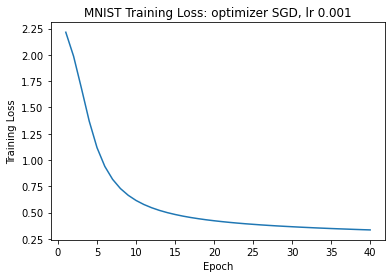

In [44]:
train()

In [45]:
test()

Test loss: 0.004984637734236991, test accuracy: 90.66481018066406
